In [1]:
from __future__ import print_function
import os
try:
    from urllib.request import urlretrieve
except ImportError:
    from urllib import urlretrieve

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
#from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing

import datetime as dt


# To identify the sentiment of text
#from textblob import TextBlob
#from textblob.sentiments import NaiveBayesAnalyzer
#from textblob.np_extractors import ConllExtractor

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is alr

In [2]:
all_ticket_df=pd.read_csv('all_ticketsnew.csv', encoding='utf-8')

labelData = all_ticket_df['ticket_type']
data = all_ticket_df['body']
data

0        hi since recruiter lead permission approve req...
1        icon dear please setup icon per icon engineers...
2        work experience user hi work experience studen...
3        requesting meeting hi please help follow equip...
4        re expire days hi ask help update passwords co...
                               ...                        
48544    sent tuesday july re git space for hi got righ...
48545    sent july error hi guys can you help out with ...
48546    sent tuesday july connection issues hello have...
48547    sent tuesday july error hello guys have receiv...
48548    hello please be advised we running out extensi...
Name: body, Length: 48549, dtype: object

In [3]:
import tensorflow as tf


In [4]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

# Split dataset into training and testing data
train_data, test_data, train_labels, test_labels = train_test_split(
        data, labelData, test_size=0.2
    )  # split data to train/test sets with 80:20 ratio

print ('Size of training data is-',train_data.shape)
print ('Size of training labels is-',len(train_labels))
print ('Size of test data is-',test_data.shape)
print ('Size of test labels is-',len(test_labels))

Size of training data is- (38839,)
Size of training labels is- 38839
Size of test data is- (9710,)
Size of test labels is- 9710


In [5]:
# load the whole embedding into memory
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(train_data)
X_train = tokenizer.texts_to_sequences(train_data)
X_test = tokenizer.texts_to_sequences(test_data)
vocab_length = len(tokenizer.word_index) + 1

print ('Size of training data is-',len(X_train))
print ('Size of training labels is-',len(train_labels))
print ('Size of test data is-',len(X_test))
print ('Size of test labels is-',len(test_labels))

Size of training data is- 38839
Size of training labels is- 38839
Size of test data is- 9710
Size of test labels is- 9710


In [6]:
#from nltk.tokenize import word_tokenize
#corpus = all_ticket_df['body'].to_list()
#all_words = []
#for sent in corpus:
#    tokenize_word = word_tokenize(sent)
#    for word in tokenize_word:
#        all_words.append(word)

#unique_words = set(all_words)
#print(len(unique_words))
#vocab_length =len(unique_words)

In [7]:
corpus = all_ticket_df['body'].to_list()
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(corpus, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))

print(length_long_sentence)

980


In [8]:
#padded_sentences = pad_sequences(embedded_sentences, length_long_sentence, padding='post')
X_train_pedd = pad_sequences(X_train, length_long_sentence, padding='post')
X_test_pedd = pad_sequences(X_test, length_long_sentence, padding='post')

print ('Size of training data is-',len(X_train_pedd))
print ('Size of training labels is-',len(train_labels))
print ('Size of test data is-',len(X_test_pedd))
print ('Size of test labels is-',len(test_labels))

Size of training data is- 38839
Size of training labels is- 38839
Size of test data is- 9710
Size of test labels is- 9710


In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
        
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Model Loss')
    plt.legend()
    

In [10]:
# define model
from tensorflow.keras import layers
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_length, 
                           output_dim=embedding_dim, 
                           input_length=length_long_sentence,
                           trainable=True))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 980, 100)          1157900   
_________________________________________________________________
flatten (Flatten)            (None, 98000)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                980010    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 2,137,921
Trainable params: 2,137,921
Non-trainable params: 0
_________________________________________________________________


In [11]:
# fit the model
#history = model.fit(padded_sentences, all_ticket_df['ticket_type'], epochs=100, verbose=1)
y_train = train_labels 
y_test = test_labels

print ('Size of training data is-',len(X_train_pedd))
print ('Size of training labels is-',len(y_train))
print ('Size of test data is-',len(X_test_pedd))
print ('Size of test labels is-',len(y_test))

history = model.fit(X_train_pedd, y_train,
                    epochs=4,
                    verbose=True,
                    validation_data=(X_test_pedd, y_test), 
                    batch_size=10)


print(type(history))


Size of training data is- 38839
Size of training labels is- 38839
Size of test data is- 9710
Size of test labels is- 9710
Epoch 1/4
3884/3884 [==============================] - 48s 12ms/step - loss: 0.3841 - accuracy: 0.8297 - val_loss: 0.1304 - val_accuracy: 0.9684
Epoch 2/4
3884/3884 [==============================] - 48s 12ms/step - loss: 0.0721 - accuracy: 0.9785 - val_loss: 0.0472 - val_accuracy: 0.9900
Epoch 3/4
3884/3884 [==============================] - 49s 13ms/step - loss: 0.0353 - accuracy: 0.9896 - val_loss: 0.0346 - val_accuracy: 0.9864
Epoch 4/4
3884/3884 [==============================] - 54s 14ms/step - loss: 0.0252 - accuracy: 0.9921 - val_loss: 0.0255 - val_accuracy: 0.9908
<class 'tensorflow.python.keras.callbacks.History'>


Training Accuracy: 99.3331
Testing Accuracy:  99.0834
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


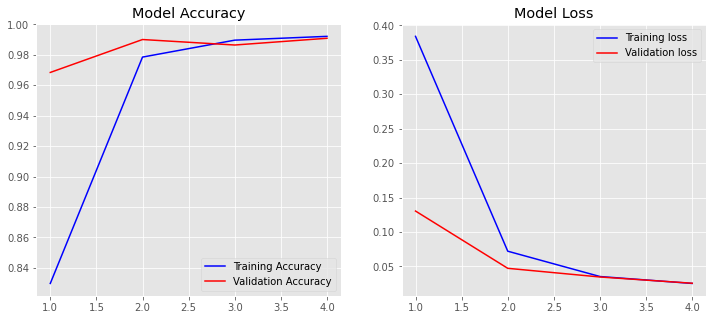

In [12]:
# evaluate the model
#loss, accuracy = model.evaluate(padded_sentences, all_ticket_df['ticket_type'], verbose=0)
#print('Accuracy: %f' % (accuracy*100))

loss, accuracy = model.evaluate(X_train_pedd, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy*100))

loss, accuracy = model.evaluate(X_test_pedd, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy*100))

print(history.history.keys())
plot_history(history)

In [13]:
#Predict

textd_1 ="hello movement has left available device please kind device denmark copenhagen denmark please source quotation shipping by lead"
textd_2 ="cannot submit hours getting error job defined for person assignment human resources application error"

testd =[textd_1,textd_2]
testd_tokens = tokenizer.texts_to_sequences(testd)
testd_tokens_pad = pad_sequences(testd_tokens, length_long_sentence, padding='post')

model.predict(x=testd_tokens_pad)

array([[0.99731016],
       [0.00909862]], dtype=float32)